In [1]:
from GAD import *
import torch
import skimage.io as io
import numpy as np

In [2]:
def to_torch(I):
    return torch.from_numpy(I.transpose((2,0,1))[np.newaxis,:,:,:])

def to_numpy(I):
    return np.squeeze(I.numpy(),0).transpose((1,2,0))

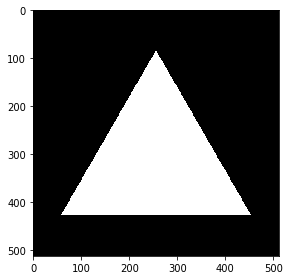

In [3]:
input_image = 1.0 * io.imread('tri-2.png')
io.imshow(input_image / 255)
input_image_torch = to_torch(input_image)

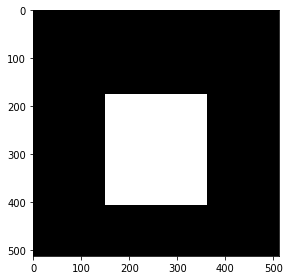

In [4]:
guide_image = 1.0 * io.imread('rect.png')
io.imshow(guide_image / 255)
guide_image_torch = to_torch(guide_image)

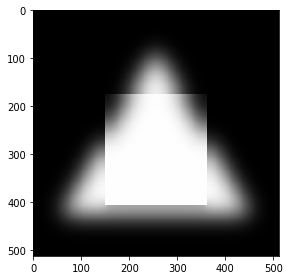

In [5]:
output_torch = anisotropic_diffusion(guide_image_torch.cuda(), guide_image_torch.cuda(), input_image_torch.cuda(), is_log=False, N=1000)
output = to_numpy(output_torch.cpu())
io.imshow(output / 255)